# Project Python Foundations: FoodHub Data Analysis
## Prepared by: **Art Zaragoza**
### Date: 7/11/2024

### Context:

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective:
*   The food aggregator company has stored the data of the different orders made by the registered customers in their online portal.
*   They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.
*   Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered.
*   Perform the data analysis to find answers to these questions that will help the company to improve the business.



### Data Description:

*   The data collected resides on the file: <font color=white>**foodhub_order.csv**</font>.
*   The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary:

1. <font color=green>**order_id**</font>: Unique ID of the order.
2. <font color=green>**customer_id**</font>: ID of the customer who ordered the food.
3. <font color=violet>**restaurant_name**</font>: Name of the restaurant
4. <font color=violet>**cuisine_type**</font>: Cuisine category ordered by the customer.
5. <font color=green>**cost_of_the_order**</font>: Cost of the order.
6. <font color=violet>**day_of_the_week**</font>: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday).
7. <font color=violet>**rating**</font>: Rating given by the customer out of 5.
8. <font color=green>**food_preparation_time**</font>: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
9.  <font color=green>**food_delivery_time**</font>:Time (in minutes) take by the elivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

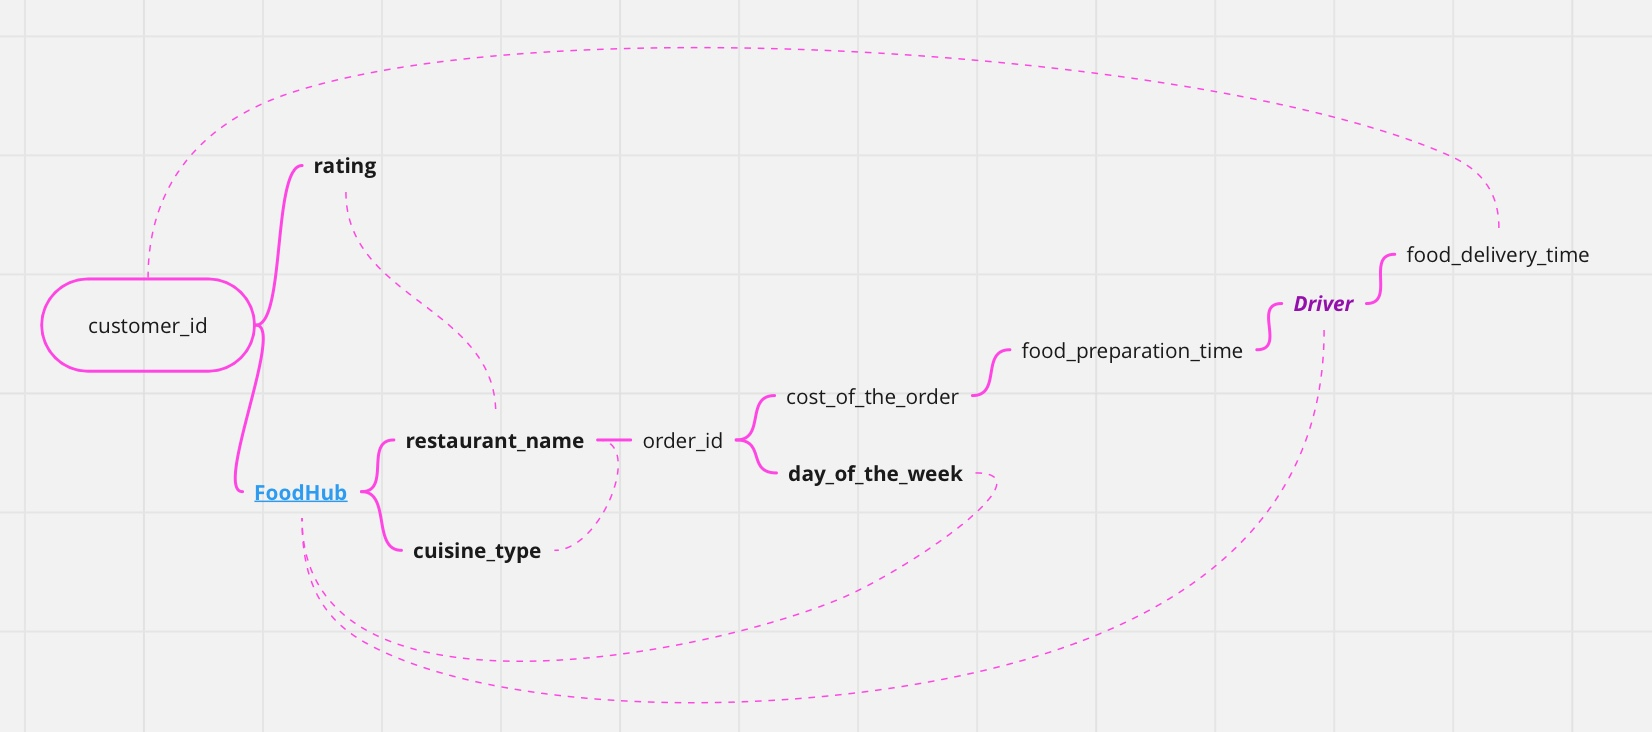

### Importing required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Import libraries for data manipulation & creating short aliases for readibility.
import numpy as np
import pandas as pd

# Import libraries for data visualization & creating short aliases for readibility.
import matplotlib as plt
import seaborn as sns

In [2]:
# Verifiyng installed versions.
print('Libraries imported successfully for Exploratory Data Analysis \n(EDA - Univariate and Multivariate):\n')
print("For Numerical Operations and Statistical Analysis of Data:")
print(". NumPy version:", np.__version__)
print(". Pandas version:", pd.__version__)
print("\nFor Visualization of Data: ")
print(". Matplotlib version:", plt.__version__)
print(". Seaborn version:", sns.__version__)

Libraries imported successfully for Exploratory Data Analysis 
(EDA - Univariate and Multivariate):

For Numerical Operations and Statistical Analysis of Data:
. NumPy version: 1.25.2
. Pandas version: 2.0.3

For Visualization of Data: 
. Matplotlib version: 3.7.1
. Seaborn version: 0.13.1


### Understanding the structure of the data

In [3]:
# Mound Google drive and Colab folder where data is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data

# Read the data from foodhub_order.csv file.
df = pd.read_csv('/content/foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows

# View the first 5 rows of the data.
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here

# Number of rows and columns in the data.
df.shape

(1898, 9)

### Answer to Question #1


---


*   There are `1898 rows` and `9 columns` on the dataset `foodhub_order.csv`.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here

# Data types of different columns in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Answer to Question #2


---


*   There are: `(1) float64, (4) int64, (4) object` datatypes in the dataset foodhub_order.csv.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here

# Check for missing values in the data.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### Answer to Question #3


---


*   There are: `no missing values` in the dataset foodhub_order.csv.
*   However, we must still check for <font color =red>`NaN`</font> and <font color =red>`Not given`</font> wherever these values are present, possibly affecting some calculations.
*   See below:


In [8]:
# Number of orders not rated.
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here

# Minimum, average, and maximum time it takes for food to be prepared once an order is placed.
# Statistical summary of the data.
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [9]:
# EXTRA CREDIT

# Same data as above. Note: Statistical information is obtained for numerical datatypes only, as shown below. There are only 5: (1) float64, (4) int64.
# Using a lamda function for rounding off to 2 digits the minimum, the average, and the maximum time it takes for food to be prepared.
# order_id and customer_id stattistics are not relevant and do not make sense other than in combination with other variables.
# Once an order is placed, transposing stats and data columns with rows for better readibility. See below:

df.describe().applymap(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


### Answer to Question #4
---

The `minimum = $4.47`, the `average cost = $16.50 (mean)` and the `maximum = $35.41`.

### Observations:
---
1.   In the dataset foodhub_order.csv, there are 5 datatypes that can be considered as candidates for statistical analysis:
<ul type="circle">
<li>order_id </li>
<li>customer_id</li>
<li>cost of the order <font color= green><-</font></li>
<li>food_preparation_time <font color= green><-</font></li>
<li>delivery_time <font color= green><-</font></li>
</ul>

2.  However, only <font color= green>**3**</font> can be examined for statistical analysis since the `order_id` and `customer_id` do not make sense.

4.  The `total time` after an order is placed can be calculated by adding  food_prepaparation_time <b>+</b>  food_delivery_time.

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here

# Number of orders not rated.
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Answer to Question #5


---


*   There are: <font color=red>**736**</font> `orders were their rating was not given` in the dataset foodhub_order.csv.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### **1st of 9 - <font color=green>order_id</font> - Data type: <font color=green>`Int`</font>**

In [11]:
# Count the number of unique order IDs
df['order_id'].nunique()

1898

### Observations - Univariate Analysis : order_id
---
*   **order_id** - Data type: <font color=green><b>*Int*</b></font>
*   There are <font color=#FF0000>**1898**</font> unique orders in the dataset.
### Recommendations:
---



1.   Investigate process 'friction' in apps workflows to boost ease of order and sales
2.   Reduce the number of steps required to place an order.



### **2nd of 9 - <font color=green>customer_id</font> - Data type: <font color=green>`Int`</font>**

In [12]:
# Count the number of unique customer IDs
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

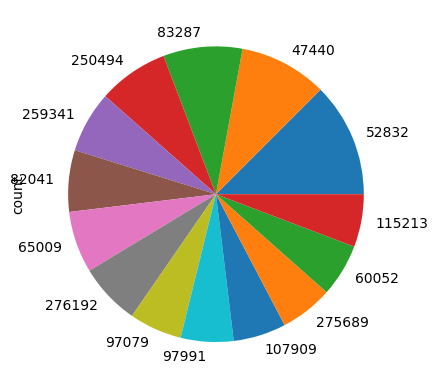

In [13]:
# Count number of orders per customer IDs.
counts = df['customer_id'].value_counts()

# Filter counts greater than 5 orders.
filtered_counts = counts[counts > 5]

# Plot the pie chart with customer IDs that order frequently (with more than 5 orders).
filtered_counts.plot(kind='pie');

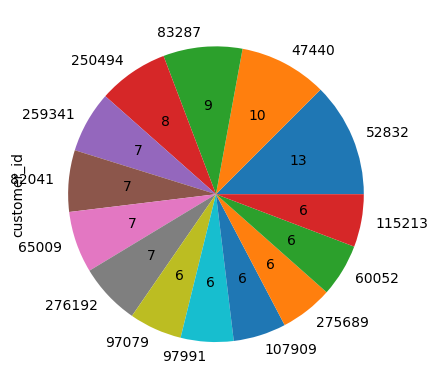

In [ ]:
# Plot the pie chart with customer IDs that order frequently with more than 5 orders and display their order count.
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100));

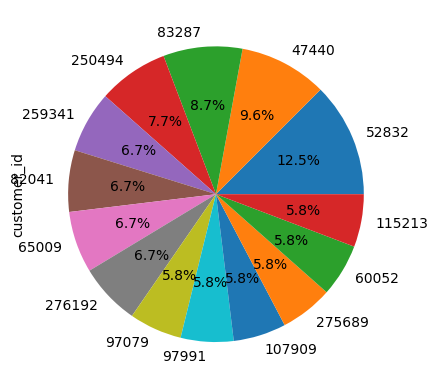

In [ ]:
# Use labels to display customer IDs and use autopct to display percentages.
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct='%1.1f%%');

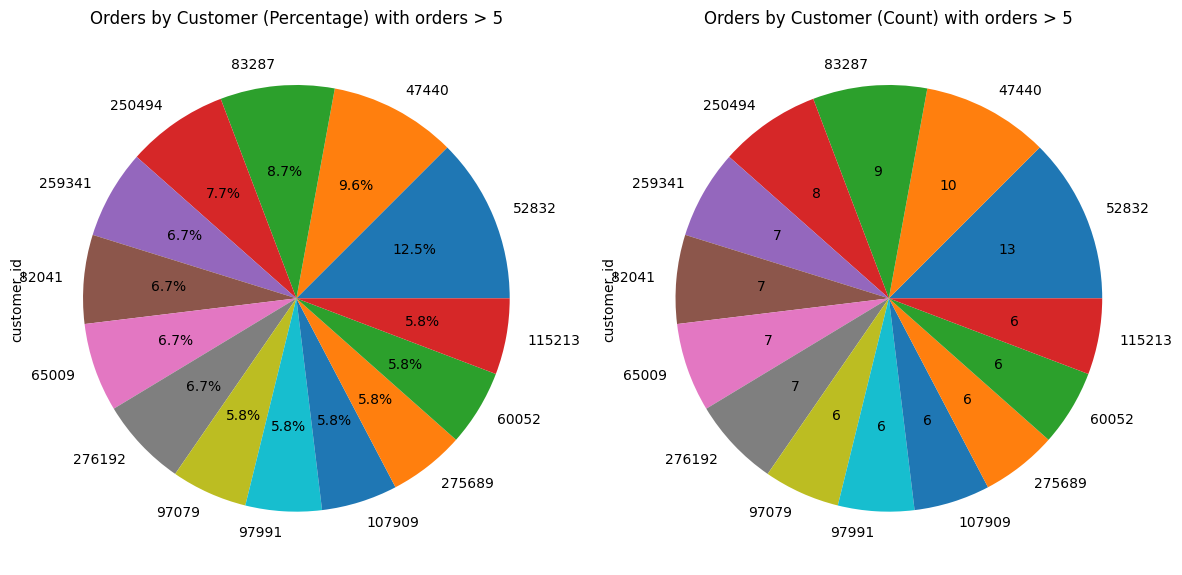

In [ ]:
# For the following plots, we will need matplotlib.
import matplotlib.pyplot as plt
# Create subplots for side-by-side display.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot with percentages.
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Orders by Customer (Percentage) with orders > 5')

# Plot with counts.
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100), ax=axes[1])
axes[1].set_title('Orders by Customer (Count) with orders > 5')

# Adjust spacing between plots.
plt.tight_layout()
plt.show()

Let's examine the customers that order more than 4 times: 
These customers should be included in any customer loyalty promotions.


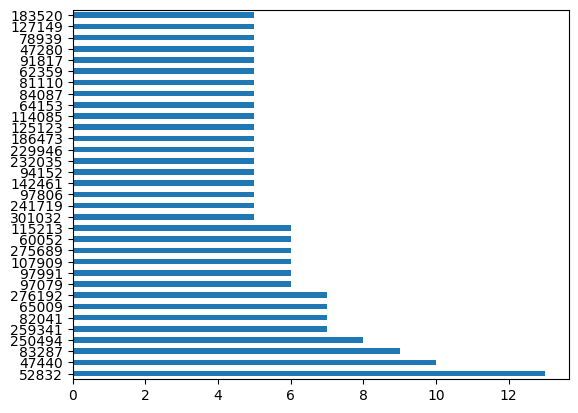

In [ ]:
# Count number of orders per customer IDs.
counts = df['customer_id'].value_counts()

# Filter counts greater than 4 orders.
filtered_counts = counts[counts > 4]

print("Let's examine the customers that order more than 4 times: ")

# Pandas horizontal bar chart invoked by 'barh' to compare all top customers.
filtered_counts.plot(kind = 'barh');

print("These customers should be included in any customer loyalty promotions.")

### Observations -**bold text** Univariate Analysis : customer_id
---
*   customer_id - Data type: <font color=green><b>*Int*</b></font>
*   There are <font color=#FF0000>**33**</font> customers that have placed more than 4 orders.
*   There are <font color=#FF0000>**14**</font> customers that have placed more than 5 orders.
* <font color=#FF0000>**52%**</font> of the orders from the top customers (ordering more than 5 times) come from 6 customers!
*   The following customers are these top 6 customers with the following number of orders:

<table>
 <tr><th>customer_id</th><th>Orders</th></tr>
 <tr><td>52832<td>13</td></tr>
 <tr><td>47440<td>10</td></tr>
 <tr><td>83287<td>9</td></tr>
 <tr><td>250494<td>8</td></tr>
 <tr><td>259341<td>7</td></tr>
 <tr><td>82041<td>7</td></tr>
 </table>

 ### Recommendations:
 ___
1.   Incentives: Top customers (`with more than 4 or 5 orders`) could be incentivised by offering additional discounts and invitations to a customer loyalty programs, for example:

*   Turning top customers into VIP members,
*   Targeting top customers to refer more customers,
*   Making their feedback more visible as they are likely to provide with higher ratings.
  
2.  Tiered Membership: Customers with less than 4 orders could also be incentivized with additional discounts and a roadmap into a future VIP membership.
3.  Augment Visibility: All customers should be encouraged to display their ordered food in social media to create pride on cooking workmanship by the originating restaurants and to provide more visibility of the restaurant or food options offered under FoodHub, as well as their ratings and cuisine type to expand the viewers "conversion funnel" into paying customers.


### **3d of 9 - <font color=violet>restaurant_name</font> - Data type: <font color=green>`Obj`</font>**

In [14]:
# Identify the order counts for each restaurant name and list them using Pandas.
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

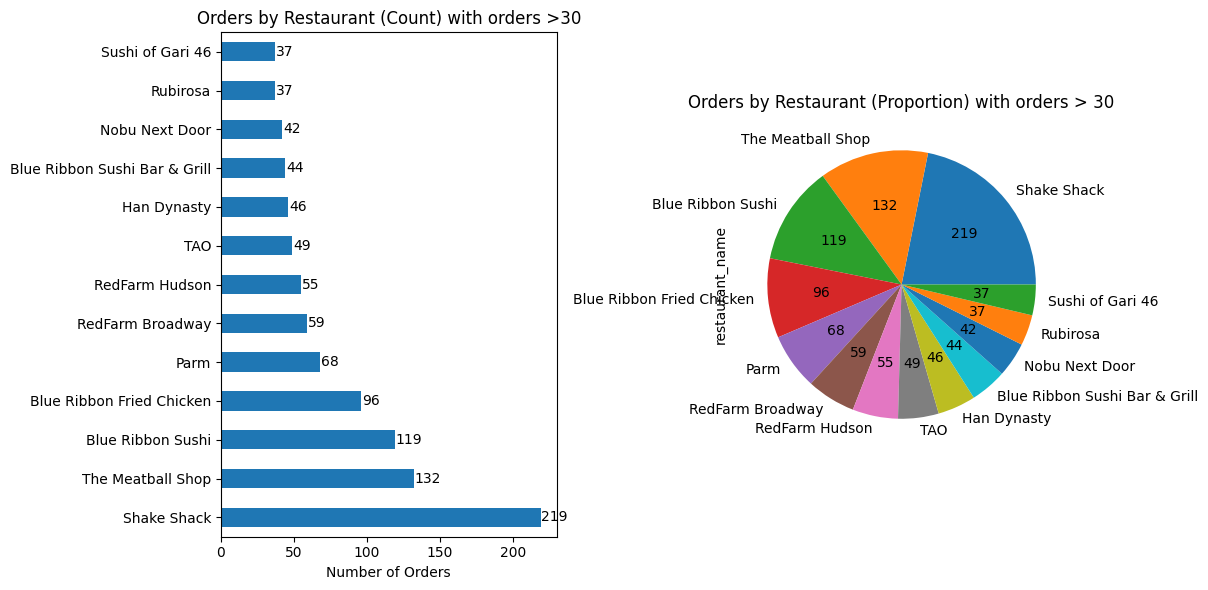

In [ ]:
# Import necessary libraries independent from previous cells that previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per customer IDs.
counts = df['restaurant_name'].value_counts()

# Filter counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot horizontal bar chart
filtered_counts.plot(kind='barh', ax=axes[0])  # Plot on the first subplot
axes[0].set_title('Orders by Restaurant (Count) with orders >30')
axes[0].set_xlabel('Number of Orders')
# Add count labels to the bars
for i, v in enumerate(filtered_counts):
    axes[0].text(v + 0.5, i, str(v), color='black', va='center')

# Plot pie chart
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100), ax=axes[1])
axes[1].set_title('Orders by Restaurant (Proportion) with orders > 30')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

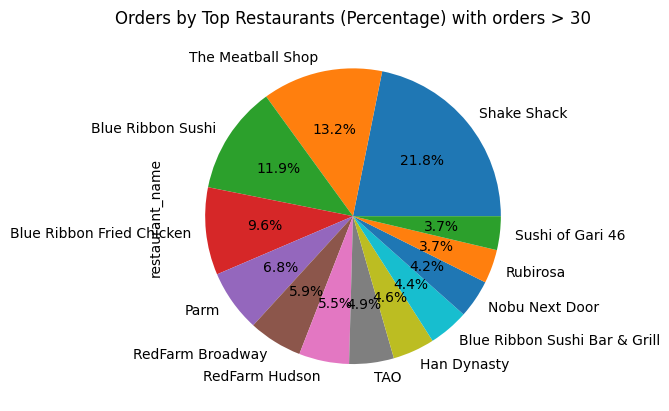

In [ ]:
# Import necessary libraries independent from previous cells that previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per customer IDs.
counts = df['restaurant_name'].value_counts()

# Filter counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Plot with percentages.
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct='%1.1f%%');
plt.title('Orders by Top Restaurants (Percentage) with orders > 30')
plt.show()

### Observations - Univariate Analysis : restaurant_name
---
*   **restaurant_name** - Data type: <font color=green><b>*Obj*</b></font>
*   Top 5 restaurants received <font color=red>**63.3%**</font> of orders that exceed 30 orders:
* Shake Shack                  219 orders
* The Meatball Shop            132 orders
* Blue Ribbon Sushi            119 orders
* Blue Ribbon Fried Chicken     96 orders
* Parm                          68 orders

### Recommendations
---
1.  Incentivize these restaurants with more benefits and visibility.
2.  Identify a path for other restaurants to do the same.



### **4th of 9 - <font color=violet>cuisine_type</font> - Data type: <font color=green>`Obj`</font>**

In [ ]:
# Identify unique cuisine type and list them using Pandas.

df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
# Identify cuisine type with value counts method using Pandas.

df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

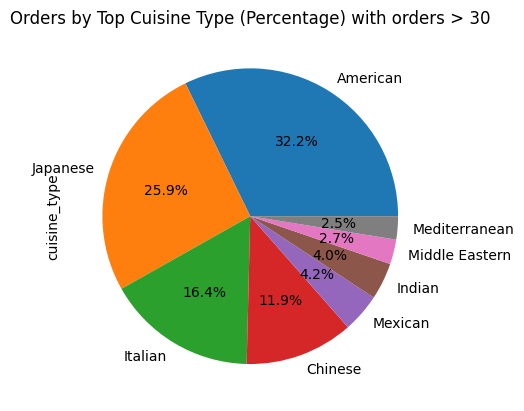

In [ ]:
# Import necessary libraries independent from previous cells that previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per customer IDs.
counts = df['cuisine_type'].value_counts()

# Filter counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Plot with percentages.
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct='%1.1f%%');
plt.title('Orders by Top Cuisine Type (Percentage) with orders > 30')
plt.show()

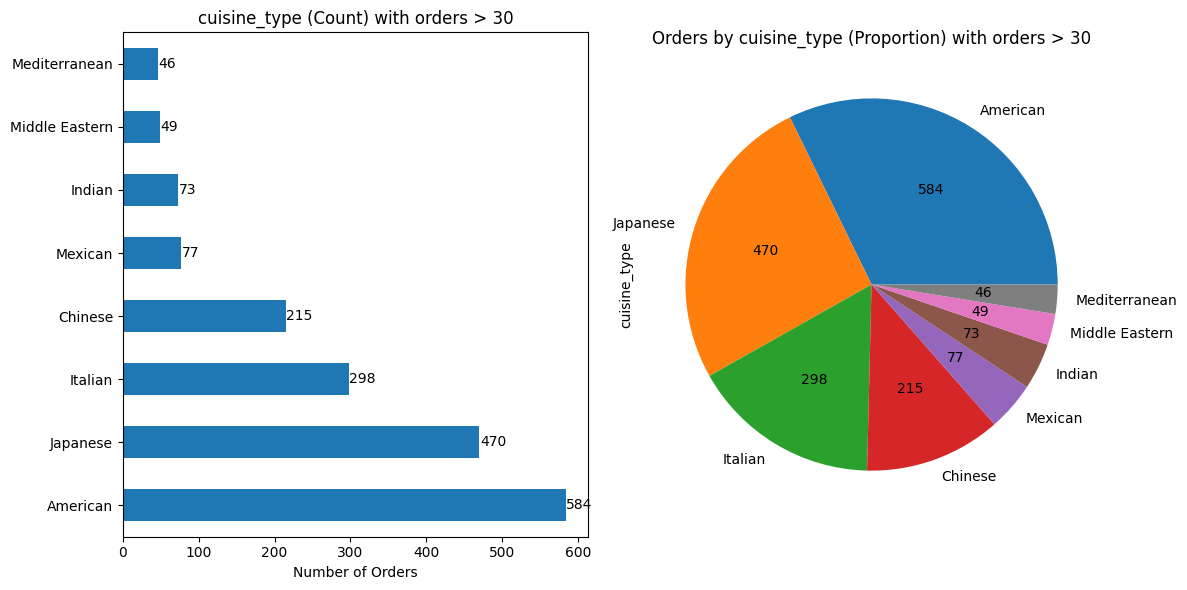

In [ ]:
# Import necessary libraries independently from previous cells that had previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per customer IDs.
counts = df['cuisine_type'].value_counts()

# Filter counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot horizontal bar chart
filtered_counts.plot(kind='barh', ax=axes[0])  # Plot on the first subplot
axes[0].set_title('cuisine_type (Count) with orders > 30')
axes[0].set_xlabel('Number of Orders')
# Add count labels to the bars
for i, v in enumerate(filtered_counts):
    axes[0].text(v + 0.5, i, str(v), color='black', va='center')

# Plot pie chart
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100), ax=axes[1])
axes[1].set_title('Orders by cuisine_type (Proportion) with orders > 30')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

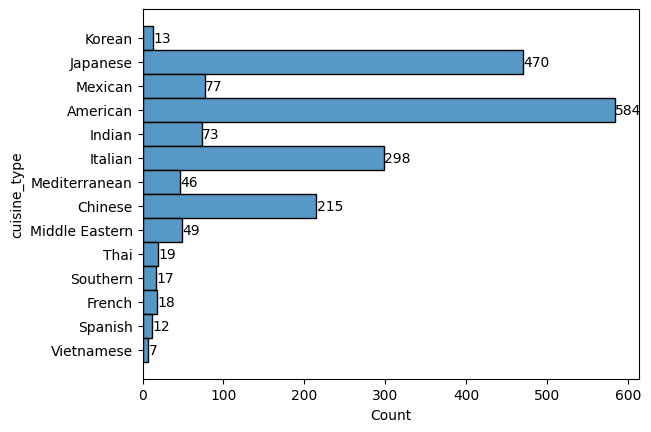

In [ ]:
# Seaborn Histogram for cuisine type.
ax = sns.histplot(data = df, y = 'cuisine_type');
# Add count labels to the bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Only label bars with non-zero width
        ax.text(width + 0.5, p.get_y() + p.get_height() / 2,
                '{:.0f}'.format(width),  # Format the count as an integer
                ha='left', va='center')

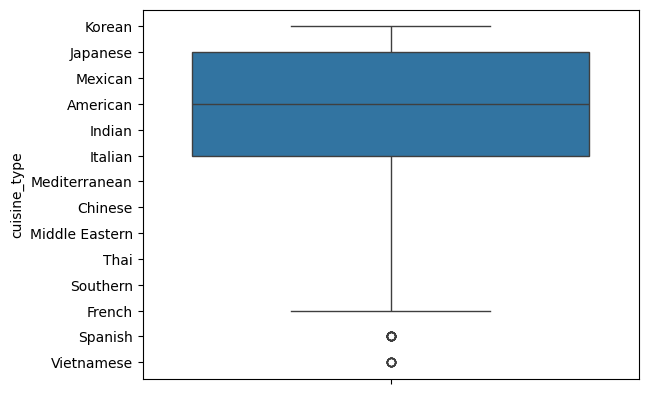

In [ ]:
# Seaborn Boxplot for cuisine type.
sns.boxplot(data = df, y = 'cuisine_type');

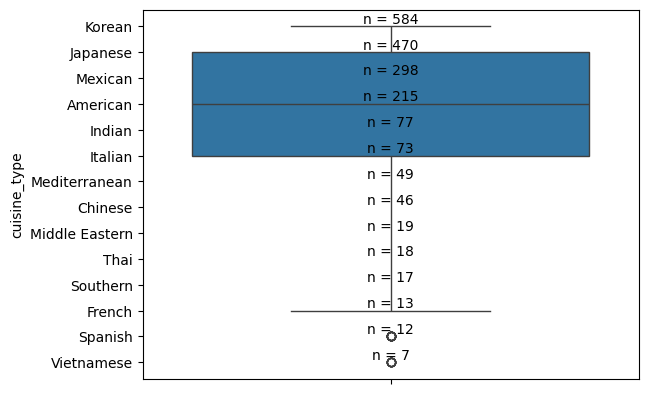

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn Boxplot for cuisine type.
ax = sns.boxplot(data=df, y='cuisine_type')

# Calculate counts for each cuisine type
cuisine_counts = df['cuisine_type'].value_counts()

# Add count labels above each box
for i, cuisine in enumerate(cuisine_counts.index):
    count = cuisine_counts[cuisine]
    ax.text(0, i, f"n = {count}", va='bottom', ha='center')

plt.show()

### Observations - Univariate Analysis : cuisine_type
---

*   **cuisine_type** - Data type: <font color=green><b>*Obj*</b></font>
*   There are <font color=#FF0000>**14**</font> unique cuisine types.
*   These **Top 5** cuisine types received <font color=red>**90.6%**</font> of orders:
1. American   584 orders
2. Japanese   470 orders
3. Italian    215 orders
4. Chinese     96 orders
5. Mexican     77 orders          

### Recommendations
---
1.  Incentivize Top restaurants based on these cuisine types with more benefits and visibility.
2.  Identify a path to include more restaurants from these top cuisine types:
1st-American
2nd-Japanese
3rd-Italian
4th-Chinese
5th-Mexican

### **5th of 9 - <font color=green>cost_of_the_order</font> - Data type: <font color=green>`Float`</font>**

In [ ]:
df['cost_of_the_order'].describe().round(2)

count    1898.00
mean       16.50
std         7.48
min         4.47
25%        12.08
50%        14.14
75%        22.30
max        35.41
Name: cost_of_the_order, dtype: float64

In [ ]:
# Identify Cost of the Order with value counts method using Pandas.
df['cost_of_the_order'].value_counts()

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64

Number of times (orders) with matching cost_of_the_order:


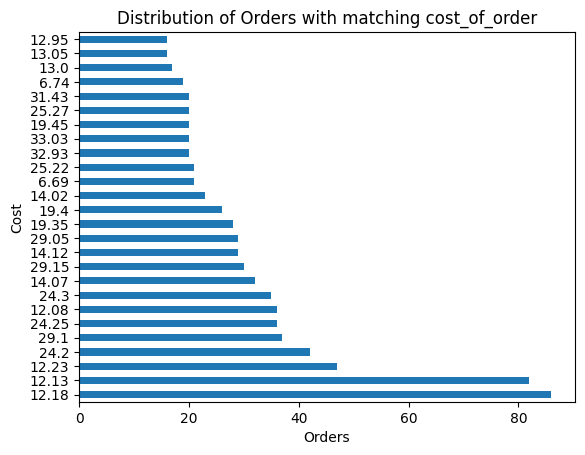

In [ ]:
# Count number of orders per cost_of_the_order.
counts = df['cost_of_the_order'].value_counts()

# Filter counts greater than 15 orders.
filtered_counts = counts[counts > 15]

# Pandas horizontal bar chart invoked by 'barh'.
filtered_counts.plot(kind = 'barh');
plt.title('Distribution of Orders with matching cost_of_order')
plt.xlabel('Orders')
plt.ylabel('Cost')

print('Number of times (orders) with matching cost_of_the_order:')

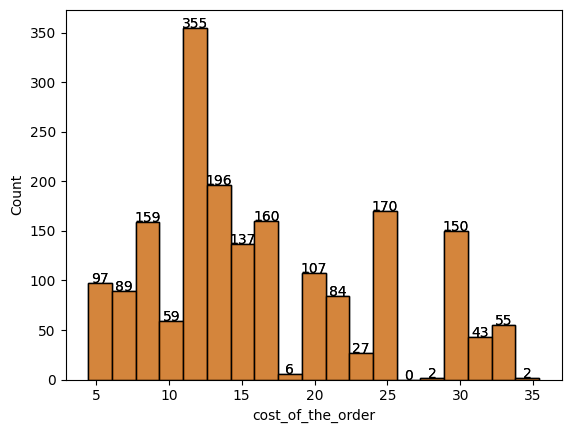

In [ ]:
# Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order');

ax = sns.histplot(data=df, x='cost_of_the_order')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")

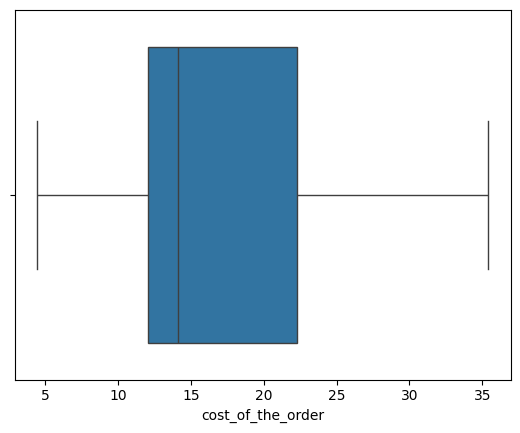

In [ ]:
# Boxplot for the cost of the order
sns.boxplot(data=df,x='cost_of_the_order');

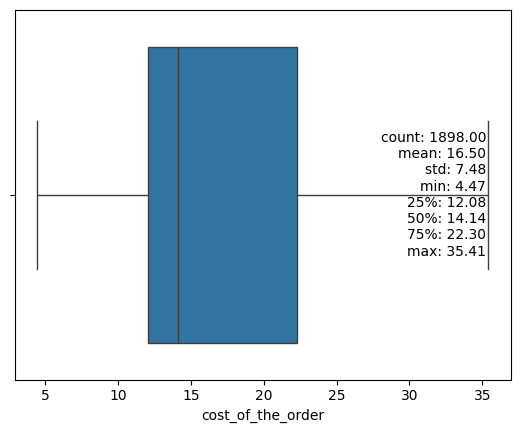

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Boxplot for food_preparation_time.
ax = sns.boxplot(data=df, x='cost_of_the_order')

# Calculate and display all relevant statistics
stats = df['cost_of_the_order'].describe()
text = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()])  # Format stats into a multi-line string

# Add text annotation with all statistics
ax.text(0.95, 0.5, text, transform=ax.transAxes, ha='right', va='center', fontsize=10)

plt.show()

In [ ]:
df['cost_of_the_order'].describe().round(2)

count    1898.00
mean       16.50
std         7.48
min         4.47
25%        12.08
50%        14.14
75%        22.30
max        35.41
Name: cost_of_the_order, dtype: float64

In [ ]:
# Get the calculated mean value
mean_cost = df['cost_of_the_order'].mean()

# Format to two decimal places
formatted_mean = "{:.2f}".format(mean_cost)

# Display the mean value formatted
print('The value of the mean: ', formatted_mean)

The value of the mean:  16.50


In [ ]:
formatted_median= df['cost_of_the_order'].median()
print('The value of the median: $',formatted_median)

The value of the median: $ 14.14


In [ ]:
# Compare boxplot and histogram vs the following stats for cost_of_the_order:
df.describe().applymap(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


### Observations - Univariate Analysis: cost_of_the_order
---

*   **cost_of_the_order** - Data type: <font color=green><b>*Float*</b></font>

*   Cost of the Order Stats:

<table>
 <tr><th>Stats</th><th>Value</th></tr>
 <tr><td>count<td>1898.0</td></tr>
 <tr><td>mean<td>16.50</td></tr>
 <tr><td>std<td>7.48</td></tr>
 <tr><td>min<td>4.47</td></tr>
 <tr><td>25%<td>12.08</td></tr>
 <tr><td>50%<td>14.14</td></tr>
 <tr><td>75%<td>22.30	</td></tr>
 <tr><td>max<td>35.41</td></tr>
 </table>

* The value of the mean:  <font color=red>`$ 16.50`</font>
* The value of the minimum: <font color=red>`$ 4.47`</font>
* The value of the maximum: <font color=red>`$ 35.41`</font>

*Observing the Pie Chart and Horizontal Plots:*
* The top 5 most frequent Cost of Orders where the following: 12.18 (86 times) | 12.13   (82 times) | 12.23 (47 times) | 24.20 (42 times) | 29.10 (37 times)

*Observing the boxplot:*
*    The box itself spans the interquartile range (IQR), which contains the middle 50% of the cost of the order at `$ 14.14` which is also the line inside the box (Median).
*    The bottom edge of the box represents the first quartile (25th percentile) at `$ 12.08`, and the top edge represents the third quartile (75th percentile) at `$ 22.30`.
*    Whiskers: The lines extending from the box (whiskers) typically represent data points within 1.5 times the IQR from the edges of the box.

### Recommendations
---
*   Advertize and promote the average cost to demonstrate high food value and lower costs.

### **6th of 9 - <font color=violet>day_of_the_week</font> - Data type: <font color=green>`Obj`</font>**

In [ ]:
# Identify Day of the Week with value counts method using Pandas.
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

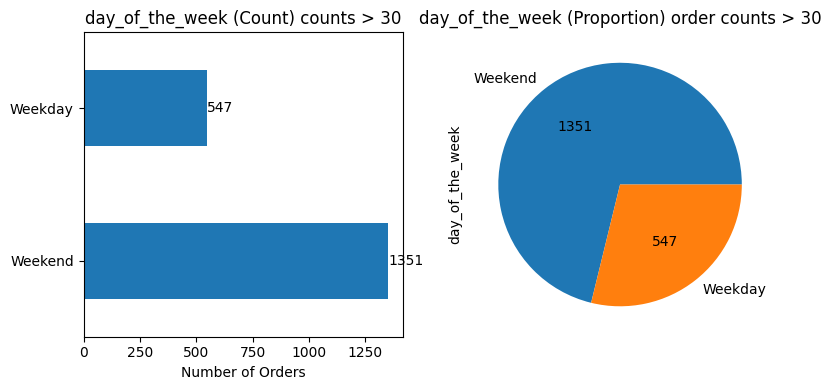

In [ ]:
# Import necessary libraries independently from previous cells that had previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per customer IDs.
counts = df['day_of_the_week'].value_counts()

# Filter counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# Plot horizontal bar chart
filtered_counts.plot(kind='barh', ax=axes[0])  # Plot on the first subplot
axes[0].set_title('day_of_the_week (Count) counts > 30')
axes[0].set_xlabel('Number of Orders')
# Add count labels to the bars
for i, v in enumerate(filtered_counts):
    axes[0].text(v + 0.5, i, str(v), color='black', va='center')

# Plot pie chart
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100), ax=axes[1])
axes[1].set_title('day_of_the_week (Proportion) order counts > 30')

# Adjust spacing between plots
plt.tight_layout()
plt.show()

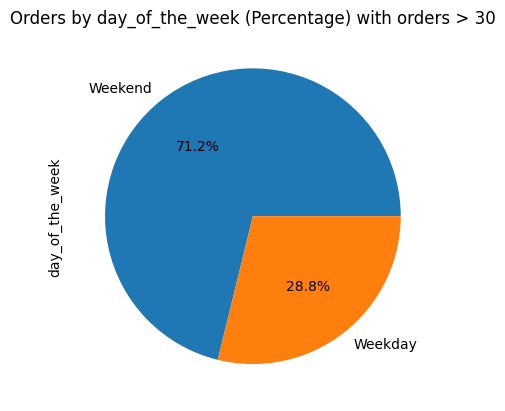

In [ ]:
# Import necessary libraries independent from previous cells that previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per customer IDs.
counts = df['day_of_the_week'].value_counts()

# Filter counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Plot with percentages.
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct='%1.1f%%');
plt.title('Orders by day_of_the_week (Percentage) with orders > 30')
plt.show()

### Observations - Univariate Analysis: day_of_the_week
---

*   **day_of_the_week** - Data type: <font color=green><b>*Obj*</b></font>
* There are more sales on **`weekends`** at the tune of <font color=red><b>`71.2%`</b></font> compared to weekedays at <font color=red><b>`28.8%`</b></font>.

### Recommendations
---
*   Advertize more sales and specials on weekends.
*   Encourage restaurants by top cuisine type to be more ready with planned food preparation ahead of the weekends.

### **7th of 9 - <font color=violet>rating</font> - Data type: <font color=green>`Obj`</font>**

In [ ]:
# Identify ratings with value counts method using Pandas.
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

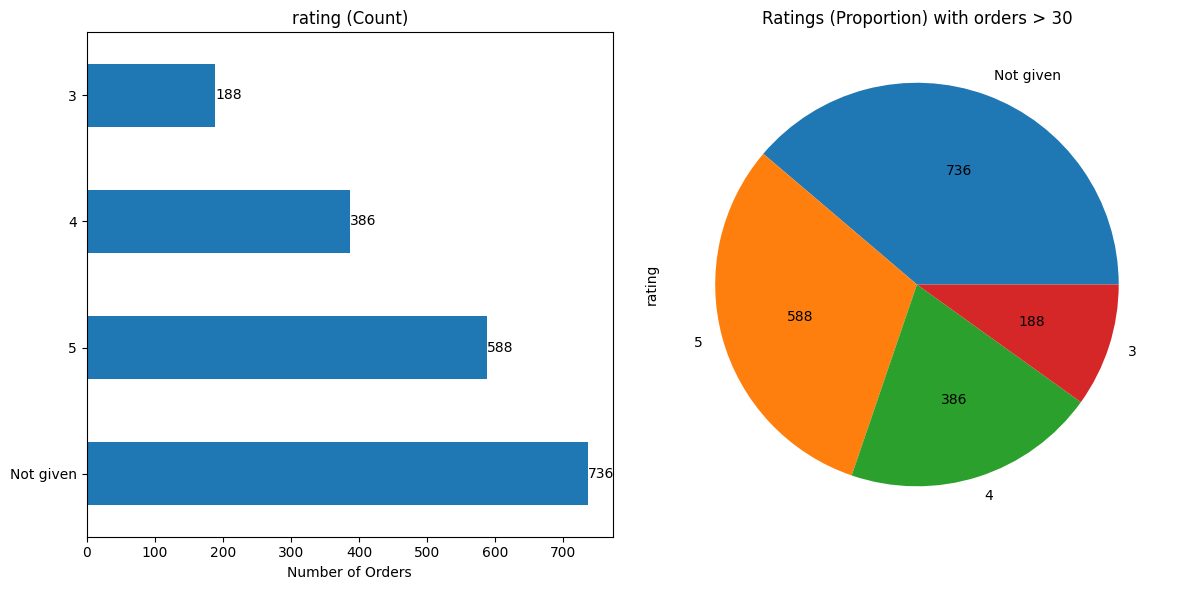

In [ ]:
# Import necessary libraries independently from previous cells that had previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per customer IDs.
counts = df['rating'].value_counts()

# Filter counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot horizontal bar chart
filtered_counts.plot(kind='barh', ax=axes[0])  # Plot on the first subplot
axes[0].set_title('rating (Count)')
axes[0].set_xlabel('Number of Orders')
# Add count labels to the bars
for i, v in enumerate(filtered_counts):
    axes[0].text(v + 0.5, i, str(v), color='black', va='center')

# Plot pie chart
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100), ax=axes[1])
axes[1].set_title('Ratings (Proportion) with orders > 30')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

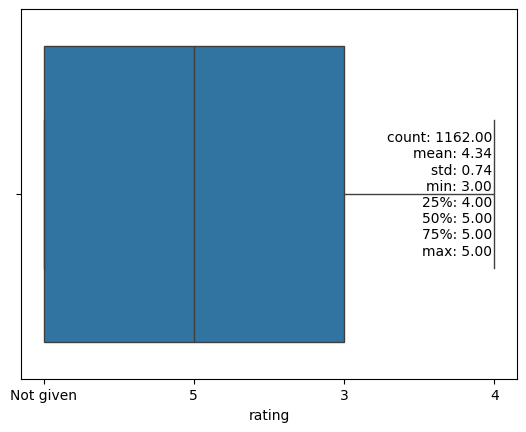

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Boxplot for food_preparation_time.
ax = sns.boxplot(data=df, x='rating')

# IMPORTANT: Convert the 'rating' column to numeric type, handling errors by setting them to NaN.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate and display all relevant statistics
stats = df['rating'].describe()
text = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()])  # Format stats into a multi-line string

# Add text annotation with all statistics
ax.text(0.95, 0.5, text, transform=ax.transAxes, ha='right', va='center', fontsize=10)

plt.show()

In [ ]:
# EXTRA CREDIT

# Calculate average rating per cuisine type and sort.
average_ratings = df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

# Print the average ratings
for cuisine, rating in average_ratings.items():
    print(f"{cuisine} - with ave. rating: {rating:.2f}")

Spanish - with ave. rating: 4.83
Thai - with ave. rating: 4.67
Indian - with ave. rating: 4.54
Mexican - with ave. rating: 4.42
Japanese - with ave. rating: 4.37
Italian - with ave. rating: 4.36
Chinese - with ave. rating: 4.34
Southern - with ave. rating: 4.31
French - with ave. rating: 4.30
American - with ave. rating: 4.30
Middle Eastern - with ave. rating: 4.24
Mediterranean - with ave. rating: 4.22
Korean - with ave. rating: 4.11
Vietnamese - with ave. rating: 4.00


In [ ]:
# EXTRA CREDIT

# Since there are restaurants with `multiple` ratings, it will be useful to see their average.

# Also, for the rating = 'Not Given' the 'rating' column needs conversion to numeric type, handling errors by setting them to NaN.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate average rating per restaurant and sort
average_ratings = df.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)

# Print the average ratings
for restaurant, rating in average_ratings.items():
    print(f"{restaurant} - with ave. rating: {rating:.2f}")

'wichcraft - with ave. rating: 5.00
Ravagh Persian Grill - with ave. rating: 5.00
Chola Eclectic Indian Cuisine - with ave. rating: 5.00
Chote Nawab - with ave. rating: 5.00
Junoon - with ave. rating: 5.00
Socarrat Paella Bar - with ave. rating: 5.00
DespaÌ±a - with ave. rating: 5.00
Dig Inn Seasonal Market - with ave. rating: 5.00
Saravanaa Bhavan - with ave. rating: 5.00
Donburi-ya - with ave. rating: 5.00
Dos Caminos - with ave. rating: 5.00
Dos Caminos Soho - with ave. rating: 5.00
Samurai Mama - with ave. rating: 5.00
El Parador Cafe - with ave. rating: 5.00
Prosperity Dumpling - with ave. rating: 5.00
Carmine's - with ave. rating: 5.00
Galli Restaurant - with ave. rating: 5.00
Grand Sichuan International - with ave. rating: 5.00
Philippe Chow - with ave. rating: 5.00
Olive Garden - with ave. rating: 5.00
Haru Gramercy Park - with ave. rating: 5.00
Moonstruck on Second - with ave. rating: 5.00
Mission Cantina - with ave. rating: 5.00
Hot Kitchen - with ave. rating: 5.00
Hunan Mano

### Observations - Univariate Analysis: rating
---

*  **rating** - Data type: <font color=green><b>*Obj*</b></font>
*  There are <font color=red>**736**</font> Ratings NOT Given. It's important to understand why from a business process standpoint.
* Analyze which parameters are affected before and after converting ratings to NaN. (Perhaps use a dataframe copy with NaN replaced the ratings Not Given.)
* Convert the 'rating' column to numeric type, handling errors by setting them to NaN. `df['rating'] = pd.to_numeric(df['rating'], errors='coerce')`
*  There are multiple ratings under restaurant names. A list with average ratings can be useful monitoring metric.
*  There are multiple ratings given by each customer, it would be interesting to see their raitings stats.

### Recommendations
---
*   Its crucial to require ratings or find ways to ensure the ratings are given per order, the number of orders where the ratings were not given is too high, way too high.
*   List item

### **8th of 9 - <font color=green>food_preparation_time</font> - Data type: <font color=green>`Int`</font>**

In [ ]:
df['food_preparation_time'].describe().round(2)

count    1898.00
mean       27.37
std         4.63
min        20.00
25%        23.00
50%        27.00
75%        31.00
max        35.00
Name: food_preparation_time, dtype: float64

In [ ]:
# Find the average food_preparation_time.
mean_prep_time = df['food_preparation_time'].mean()
# Format to two decimal places
formatted_mean = "{:.2f}".format(mean_prep_time )
print('The value of the mean or average (mean) preparation time: \033[1;31m{}'.format(formatted_mean))

The value of the mean or average (mean) preparation time: 27.37


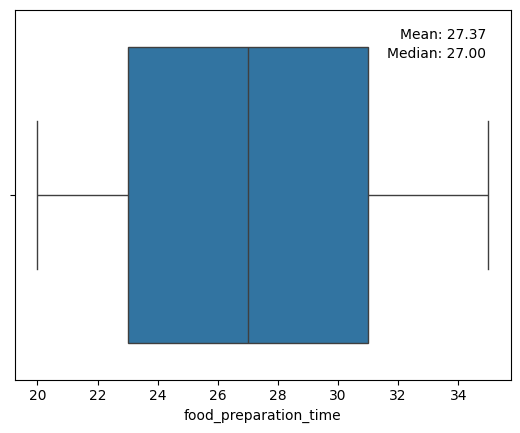

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for food_preparation_time.
ax = sns.boxplot(data=df, x='food_preparation_time')

# Calculate statistical values
mean_time = df['food_preparation_time'].mean()
median_time = df['food_preparation_time'].median()

# Add text annotations for mean and median
ax.text(0.95, 0.95, f"Mean: {mean_time:.2f}", transform=ax.transAxes, ha='right', va='top')
ax.text(0.95, 0.90, f"Median: {median_time:.2f}", transform=ax.transAxes, ha='right', va='top')

plt.show()

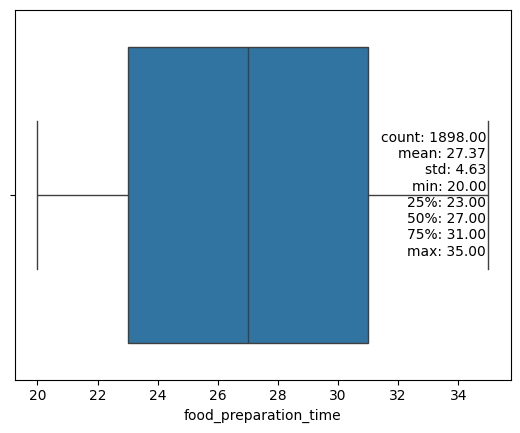

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Boxplot for food_preparation_time.
ax = sns.boxplot(data=df, x='food_preparation_time')

# Calculate and display all relevant statistics
stats = df['food_preparation_time'].describe()
text = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()])  # Format stats into a multi-line string

# Add text annotation with all statistics
ax.text(0.95, 0.5, text, transform=ax.transAxes, ha='right', va='center', fontsize=10)

plt.show()

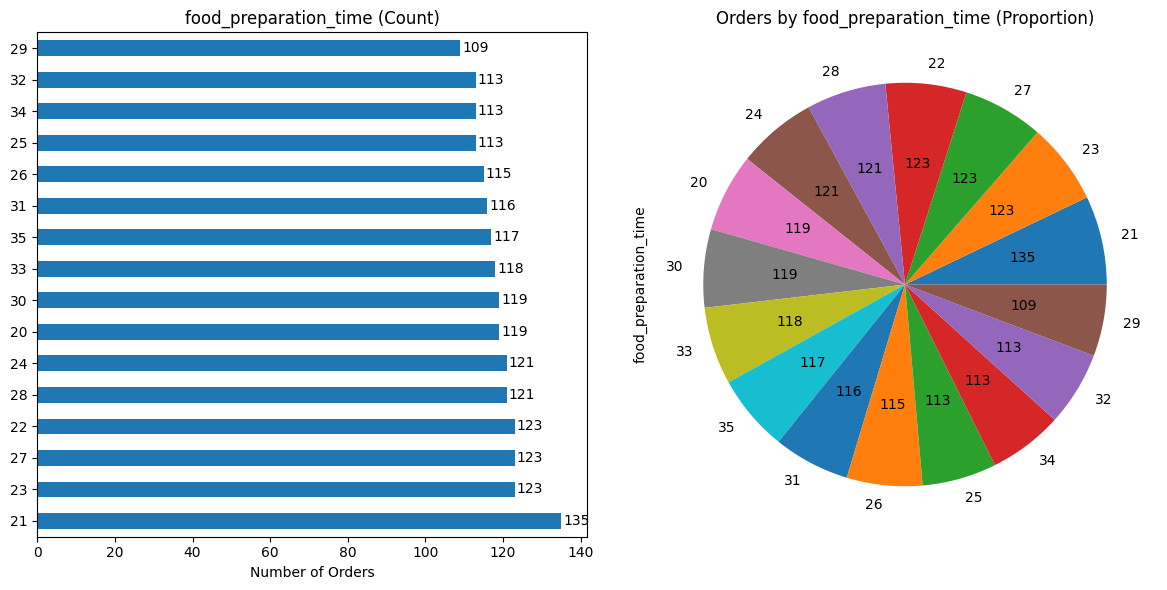

In [ ]:
# Import necessary libraries independently from previous cells that had previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per food_preparation_time.
counts = df['food_preparation_time'].value_counts()

# Filter food_preparation_time with counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot horizontal bar chart
filtered_counts.plot(kind='barh', ax=axes[0])  # Plot on the first subplot
axes[0].set_title('food_preparation_time (Count)')
axes[0].set_xlabel('Number of Orders')
# Add count labels to the bars
for i, v in enumerate(filtered_counts):
    axes[0].text(v + 0.5, i, str(v), color='black', va='center')

# Plot pie chart
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100), ax=axes[1])
axes[1].set_title('Orders by food_preparation_time (Proportion)')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [ ]:
# Identify stats for food_preparation_time
df['food_preparation_time'].describe().round(2)

count    1898.00
mean       27.37
std         4.63
min        20.00
25%        23.00
50%        27.00
75%        31.00
max        35.00
Name: food_preparation_time, dtype: float64

### Observations - Univariate Analysis: food_preparation_time
---

*   **food_preparation_time** - Data type: <font color=green><b>*`Int`*</b></font>
*  The value of the mean or average (mean) preparation time: <font color=red>**`27.37`**</font> minutes.
*  The value of the median preparation time: <font color=red>**`27.37`**</font> minutes.
*  The value of the shortest (min) preparation time: <font color=red>**`20.00`**</font> minutes.
*  The value of the longest (max) preparation time: <font color=red>**`35.00`**</font> minutes.

### Recommendations
---
*   food_preparation_time is directly associated with the reastaurant and explorations how to best prepare in advance anticipating orders peak times and weekends can decrease times.  This in turn favors customers satisfaction and ratings.   
*   food_preparation_time must be added to food_delivery_time to get a complete analysis for the overall order durations.

### **9th of 9 - <font color=green>delivery_time</font> - Data type: <font color=green>`Int`</font>**

In [ ]:
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [ ]:
# Identify ratings with value counts method using Pandas.
df['delivery_time'].value_counts()

delivery_time
24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: count, dtype: int64

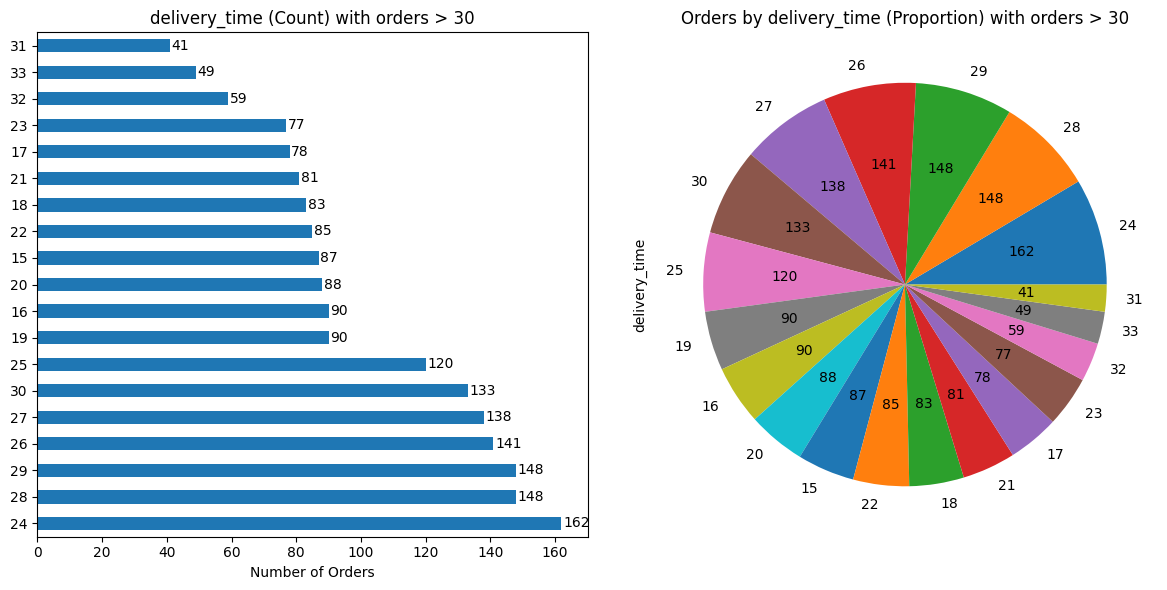

In [ ]:
# Import necessary libraries independently from previous cells that had previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Count number of orders per food_preparation_time.
counts = df['delivery_time'].value_counts()

# Filter food_preparation_time with counts greater than 30 orders.
filtered_counts = counts[counts > 30]

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot horizontal bar chart
filtered_counts.plot(kind='barh', ax=axes[0])  # Plot on the first subplot
axes[0].set_title('delivery_time (Count) with orders > 30')
axes[0].set_xlabel('Number of Orders')
# Add count labels to the bars
for i, v in enumerate(filtered_counts):
    axes[0].text(v + 0.5, i, str(v), color='black', va='center')

# Plot pie chart
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100), ax=axes[1])
axes[1].set_title('Orders by delivery_time (Proportion) with orders > 30')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

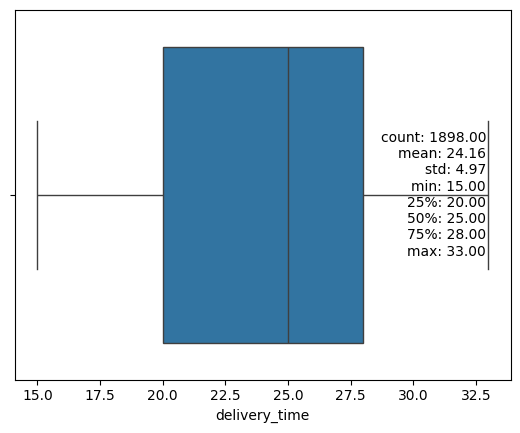

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Boxplot for food_preparation_time.
ax = sns.boxplot(data=df, x='delivery_time')

# Calculate and display all relevant statistics
stats = df['delivery_time'].describe()
text = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()])  # Format stats into a multi-line string

# Add text annotation with all statistics
ax.text(0.95, 0.5, text, transform=ax.transAxes, ha='right', va='center', fontsize=10)

plt.show()

In [ ]:
df['delivery_time'].describe().round(2)

count    1898.00
mean       24.16
std         4.97
min        15.00
25%        20.00
50%        25.00
75%        28.00
max        33.00
Name: delivery_time, dtype: float64

### Observations - Univariate Analysis: food_delivery_time
---

*   **food_delivery_time** - Data type: <font color=green><b>*`Int`*</b></font>
*  The value of the mean or average (mean) food_delivery_time: <font color=red>**`24.16`**</font> minutes.
*  The value of the median food_delivery_time: <font color=red>**`25.00`**</font> minutes.
*  The value of the shortest (min) food_delivery_time: <font color=red>**`15.00`**</font> minutes.
*  The value of the longest (max) food_delivery_time: <font color=red>**`33.00`**</font> minutes.

### Recommendations
---
*   food_delivery_time is directly associated with the reastaurant and explortions how to best prepare in advance anticipating orders peak times and weekends can decrease times.  This in turn favors customers satisfaction and ratings.   
*   food_delivery_time must be added to food_preparation_time to get a complete analysis for the overall order durations.

In [ ]:
# EXTRA CREDIT

# Calculate the total time (delivery + preparation)
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

# Calculate and display statistics for the total time
total_time_stats = df['total_time'].describe().round(2)

# Print the total time statistics
print("Total Time Statistics:\n")
print(total_time_stats)

Total Time Statistics:

count    1898.00
mean       51.53
std         6.83
min        35.00
25%        47.00
50%        52.00
75%        56.00
max        68.00
Name: total_time, dtype: float64


### Observations Univariate Analysis: Aggregata total_time
---

*   total_time (delivery + preparation) aggregate - Data type: <font color=green><b>*Int*</b></font>
*  The value of the mean or average (mean) total_time: <font color=red>**`51.53`**</font> minutes.
*  The value of the median total_time: <font color=red>**`52.00`**</font> minutes.
*  The value of the shortest (min) total_time: <font color=red>**`35.00`**</font> minutes.
*  The value of the longest (max) total_time: <font color=red>**`68.00`**</font> minutes.

### Recommendations
---
*   total_time is directly associated with the driver/traffic/weather/ day of the week and the reastaurant distance and preparation_time the goal is to find ways to decrease times under these conditions.  This in turn favors customers satisfaction and ratings.   

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here

# Naturally displaying the top 5 and lowest 5 values in a column from a dataframe.
df.value_counts('restaurant_name')

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Length: 178, dtype: int64

In [15]:
# Write the code here

# Naturally displaying the top 5 and lowest 5 values in a column from a dataframe.
df.value_counts('restaurant_name')[:5] # Top 5 <----------------------------------------

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [ ]:
# EXTRA CREDIT

# Cleaner formating to enhance readibility.

# top_5_restaurants. In this case, each item is a key-value pair (restaurant name and its count).
# top_5_restaurants is the object containing the top 5 restaurants and their counts:

top_5_restaurants = df['restaurant_name'].value_counts().head(5)

''' ANSI escape codes: We use ANSI escape codes to format the output: Bold restaurant_name, italic in red for count

   # \033[1m: Starts bold formatting.
   # \033[0m: Resets all formatting to default.
   # \033[3m: Starts italic formatting.
   # \033[31m: Sets the text color to red.
   #  .format(restaurant, count): This inserts the restaurant name and count into the formatted string.'''

for restaurant, count in top_5_restaurants.items():
    print("\033[1m{}\033[0m: \033[3;31m{}\033[0m".format(restaurant, count))

   # -restaurant- will hold the name of the restaurant.
   # -count- will hold the number of times that restaurant appears in the data.
   # in top_5_restaurants.items(): This specifies what to iterate over.
   # .items() is a method that returns a view object containing the key-value pairs (restaurant name and count)
   # of the top_5_restaurants object.

Shake Shack: 219
The Meatball Shop: 132
Blue Ribbon Sushi: 119
Blue Ribbon Fried Chicken: 96
Parm: 68


### Answer to Question #7:


---


TOP 5 Restaurants:
<table>
 <tr><th>restaurant_name</th><th>Orders</th></tr>
 <tr><td>1. Shake Shack: <td>219</td></tr>
 <tr><td>2. The Meatball Shop: <td>132</td></tr>
 <tr><td>3. Blue Ribbon Sushi: <td>119</td></tr>
 <tr><td>4. Blue Ribbon Fried Chicken: <td>96</td></tr>
 <tr><td>5. Parm:<td>68</td></tr>
 </table>

### Recommendations:
---


*   Visit and partner for co-marketing with each of them to boost mutual visibility.
*   Advertize their rankings and popularity on a regular basis.
*   Use rankins to monitor trends and alert whenever the trending is negative.
*   Based on the cuisine_type these restaurants belong to, expose customers to them via a recommendations engine/algorythm.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

# Get most popular cuisine on weekends

# Select the rows of data that match the day_of_the_week = Weekend
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# Group the data by cuisine_type and count the occurrences.
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [ ]:
# EXTRA CREDIT

# Get most popular cuisine on weekdays

# Select the rows of data that match the day_of_the_week not = Weekend (i.o.w. Weekdays)
df_weekend = df[df['day_of_the_week'] != 'Weekend']

# Group the data by cuisine_type and count the occurrences.
df_weekend['cuisine_type'].value_counts()

American          169
Japanese          135
Italian            91
Chinese            52
Mexican            24
Indian             24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
Name: cuisine_type, dtype: int64

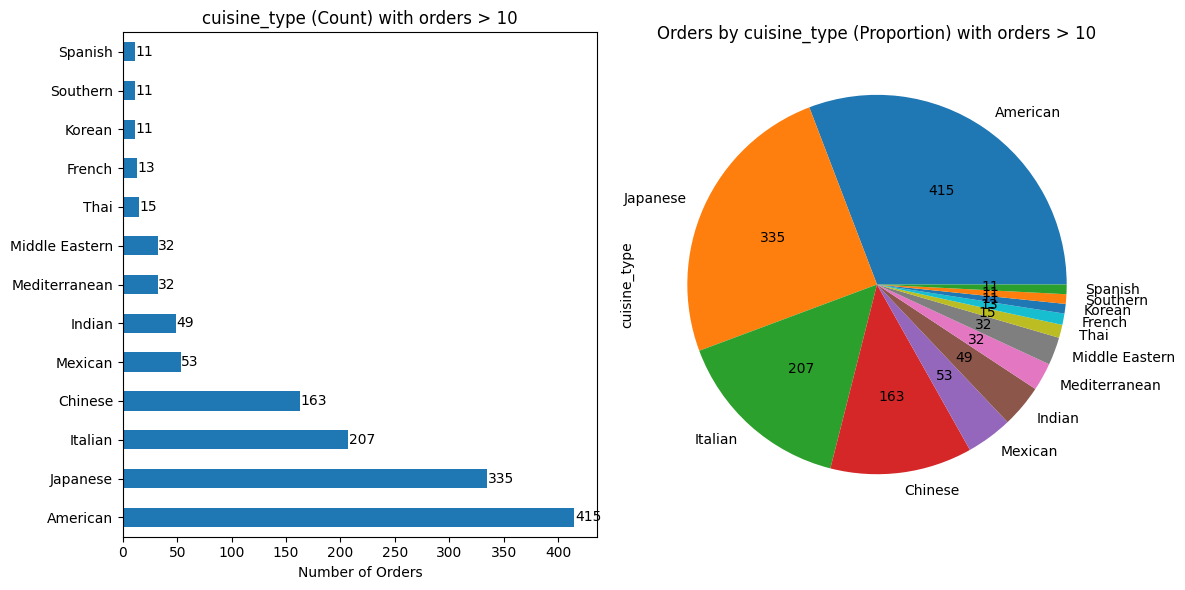

In [ ]:
# EXTRA CREDIT

# Find the most popular cuisine types on the weekends that exceed more than 10 orders and plot their distributions.

# Import necessary libraries independently from previous cells that had previously imported them.
import pandas as pd
import matplotlib.pyplot as plt

# Select the rows of data that match the day_of_the_week not = Weekend (i.o.w. Weekdays)
df_weekend = df[df['day_of_the_week'] == 'Weekend']

# Group the data by cuisine_type and count the occurrences.
df_weekend['cuisine_type'].value_counts()

# Count number of orders per cuisine_type.
counts = df_weekend['cuisine_type'].value_counts()

# Filter cuisine_type with counts greater than 10 orders.
filtered_counts = counts[counts > 10]

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot horizontal bar chart
filtered_counts.plot(kind='barh', ax=axes[0])  # Plot on the first subplot
axes[0].set_title('cuisine_type (Count) with orders > 10')
axes[0].set_xlabel('Number of Orders')
# Add count labels to the bars
for i, v in enumerate(filtered_counts):
    axes[0].text(v + 0.5, i, str(v), color='black', va='center')

# Plot pie chart
filtered_counts.plot(kind='pie', labels=filtered_counts.index, autopct=lambda pct: '{:.0f}'.format(pct*filtered_counts.sum()/100), ax=axes[1])
axes[1].set_title('Orders by cuisine_type (Proportion) with orders > 10')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

### Answer to Question #8:


---


*  These **Top 5** cuisine types received <font color=red>**`90.6%`**</font> of orders:
1. American   584 orders
2. Japanese   470 orders
3. Italian    215 orders
4. Chinese     96 orders
5. Mexican     77 orders  

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

# Get orders that cost above 20 dollars.
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The count of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

The count of total orders that cost above 20 dollars is: 555


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# ANSI escape codes for bold (1) and red (31) for the result, for readibility.
# \033[1m: Starts bold formatting.
# \033[31m: Sets the text color to red.
# \033[m: Resets all formatting to default.
print("The total number orders that cost greater than $20 is: \033[1;31m{}\033[m".format(df_greater_than_20.shape[0]))

The total number orders that cost greater than $20 is: 555


In [ ]:
# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

# print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')
print("Percentage of orders greater than $20: \033[1;31m{}\033[m%".format(round(percentage, 2)))

Percentage of orders greater than $20: 29.24%


### Answer to Question #9:


---


*   The total number of orders that cost above 20 dollars is: <font color=red>**`555`**</font>
*   Percentage of orders above 20 dollars: <font color=red>**`29.24 %`**</font>


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

# Mean delivery time
mean_del_time = df['delivery_time'].mean()

# print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')
# Print result with formatted fonts.
print('The mean delivery time for this dataset is \033[1;31m{:.2f}\033[m minutes'.format(round(mean_del_time, 2)))

The mean delivery time for this dataset is 24.16 minutes


### Answer to Question #10:


---


* The mean delivery time for this dataset is <font color=red> **`24.16`**</font> minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

# See above Observations under customers_id.

# List the top 3 customer_ids that have the most orders.
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [ ]:
# EXTRA CREDIT

# Identify the total_spent by each customer_id and their corresponding average spend per order placed (average_order_value).
customer_orders = df.groupby('customer_id').agg(
    num_orders=('order_id', 'count'),
    total_spent=('cost_of_the_order', 'sum'),
    avg_order_value=('cost_of_the_order', 'mean')
).sort_values('num_orders', ascending=False)

# Format avg_order_value to two decimal places
customer_orders['avg_order_value'] = customer_orders['avg_order_value'].round(2)

print(customer_orders)

             num_orders  total_spent  avg_order_value
customer_id                                          
52832                13       225.80            17.37
47440                10       158.18            15.82
83287                 9       139.31            15.48
250494                8       183.83            22.98
65009                 7        99.49            14.21
...                 ...          ...              ...
105903                1        24.30            24.30
105992                1        24.30            24.30
106006                1        16.10            16.10
106324                1        16.20            16.20
405334                1        25.22            25.22

[1200 rows x 3 columns]


### Answer to Question #11:


---


Top Customers (IDs) and number of orders:
1. 52832    13 orders spending a total of 225.80
2. 47440    10 orders spending a total of 158.18
3. 83287     9 orders spending a total of 139.31

### Recommendations:


---
* Incentivize these customers to spend more :-)
* See the total spend above (EXTRA CREDIT)



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Answers to Question #12


---


STRATEGY TO EXPLORE AND ANALYZE


* First ask which variables may likely have correlations and list them.
* Then ask which correrelated variables could provide useful statistics and insights.
* What additional data could be useful to collect to expand the quality of the data set?


### Exploring Relationships between multiple features

In [ ]:
# Write the code here

# Exploring Relationships between features through a scatter plot
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

Output hidden; open in https://colab.research.google.com to view.

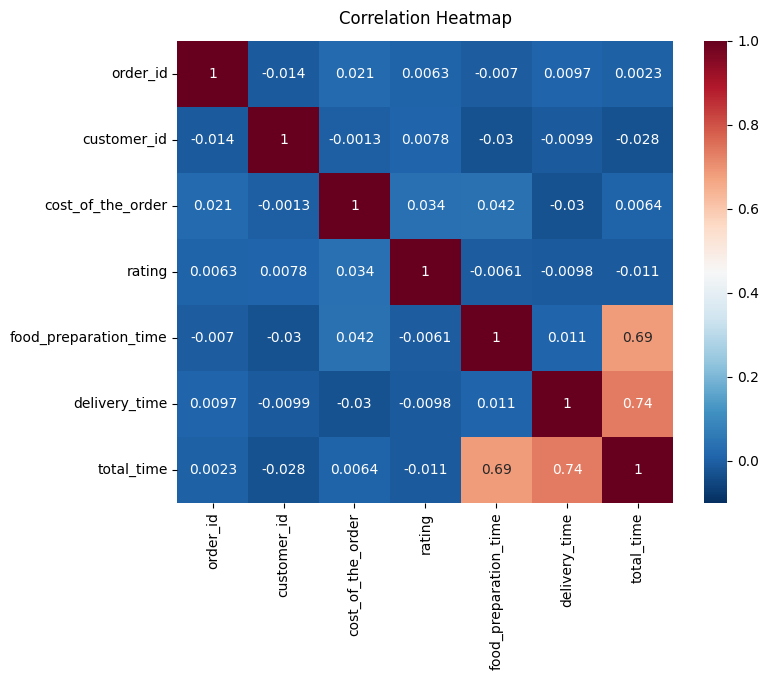

In [ ]:
# Write the code here

# Exploring Relationships between features through a heatmap plot

correlation = df.corr(numeric_only=True)

#display(correlation)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-.10, cmap="RdBu_r");
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Relationship between cuisine_type vs cost_of_the_order

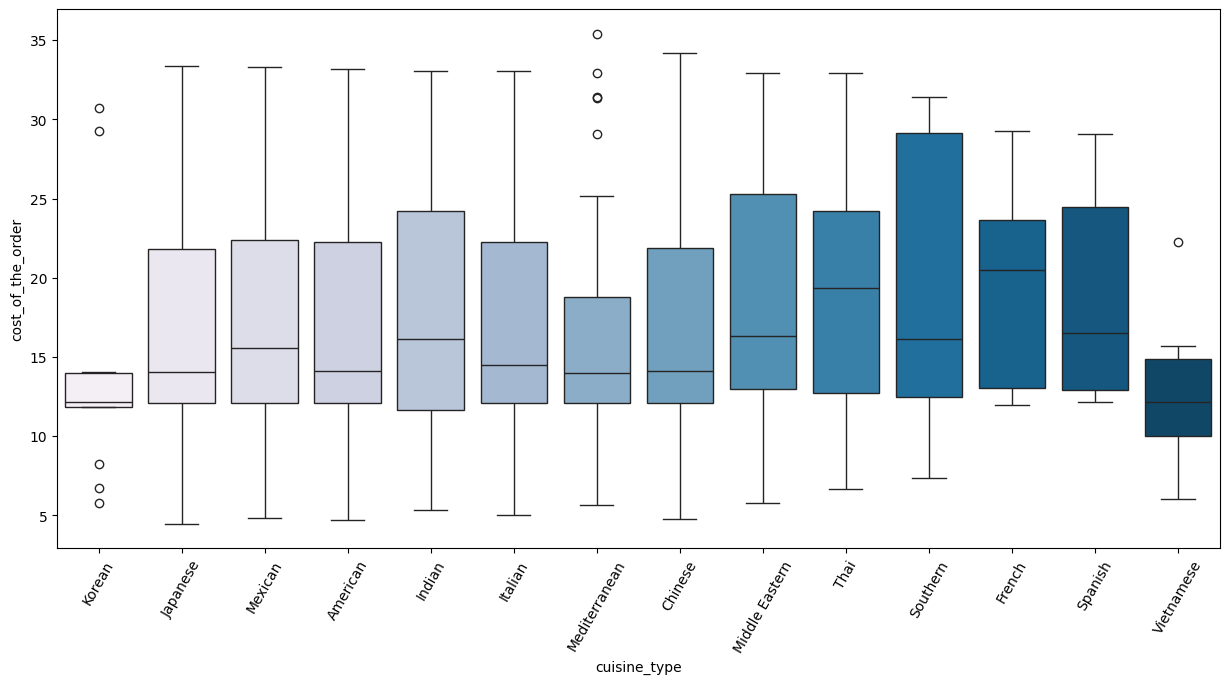

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

### Relationship between Cuisine type versus order count, total spent and average order value

In [ ]:
# EXTRA CREDIT

# cuisine_type total_spent and average_order_value:
cuisine_stats = df.groupby('cuisine_type').agg(
    num_orders=('order_id', 'count'),
    total_spent=('cost_of_the_order', 'sum'),
    avg_order_value=('cost_of_the_order', 'mean')
).sort_values('num_orders', ascending=False)

# Format avg_order_value to two decimal places
cuisine_stats['avg_order_value'] = cuisine_stats['avg_order_value'].round(2)

print(cuisine_stats)

                num_orders  total_spent  avg_order_value
cuisine_type                                            
American               584      9530.78            16.32
Japanese               470      7663.13            16.30
Italian                298      4892.77            16.42
Chinese                215      3505.62            16.31
Mexican                 77      1303.85            16.93
Indian                  73      1235.14            16.92
Middle Eastern          49       922.21            18.82
Mediterranean           46       711.84            15.47
Thai                    19       364.95            19.21
French                  18       356.29            19.79
Southern                17       328.11            19.30
Korean                  13       182.02            14.00
Spanish                 12       227.93            18.99
Vietnamese               7        90.18            12.88


### Relationship between cuisine_type vs calculated total_time (`preparation_time` <font color=red>**+**</font> `delivery_time`)

In [ ]:
# Write the code here

# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
orders_grt60mins = df[df['total_time'] >60]
print('Percentage of orders that take more than 60 minutes of total delivery time \033[1;31m\033[m', round(orders_grt60mins.shape[0] / df.shape[0] * 100, 2), '%')

Percentage of orders that take more than 60 minutes of total delivery time  10.54 %


In [ ]:
# EXTRA CREDIT

# cuisine_type total_spent and average_order_value:
cuisine_stats = df.groupby('cuisine_type').agg(
    num_orders=('order_id', 'count'),
    avg_time_value=('total_time', 'mean'),
    total_spent=('cost_of_the_order', 'sum'),
    avg_order_value=('cost_of_the_order', 'mean')
).sort_values('num_orders', ascending=False)

# Format avg_order_value to two decimal places
cuisine_stats['avg_order_value'] = cuisine_stats['avg_order_value'].round(2)
cuisine_stats['avg_time_value'] = cuisine_stats['avg_time_value'].round(2)

print(cuisine_stats)

                num_orders  avg_time_value  total_spent  avg_order_value
cuisine_type                                                            
American               584           51.63      9530.78            16.32
Japanese               470           51.64      7663.13            16.30
Italian                298           52.05      4892.77            16.42
Chinese                215           51.37      3505.62            16.31
Mexican                 77           51.12      1303.85            16.93
Indian                  73           51.19      1235.14            16.92
Middle Eastern          49           50.76       922.21            18.82
Mediterranean           46           50.59       711.84            15.47
Thai                    19           50.47       364.95            19.21
French                  18           52.22       356.29            19.79
Southern                17           51.41       328.11            19.30
Korean                  13           46.38       18

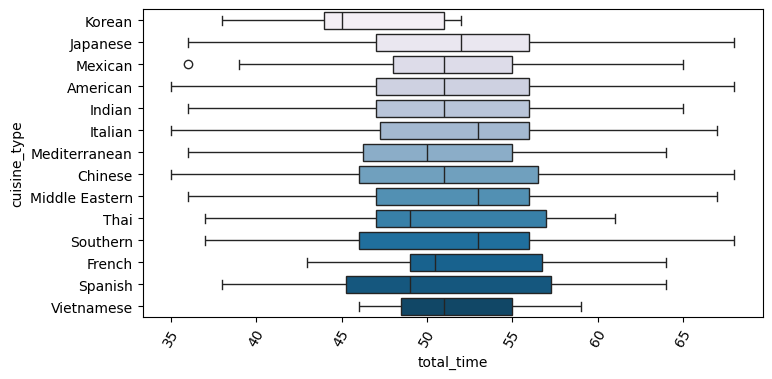

In [ ]:
# Relationship between cuisine type and total time = (food_preparation_time + food_delivery_time)

plt.figure(figsize=(8,4))
sns.boxplot(y = "cuisine_type", x = "total_time", data = df, palette = 'PuBu', hue = "cuisine_type")  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

### Relationship between day_of_the_week vs calculated total time (`preparation_time` <font color=red>**+**</font> `delivery_time`)

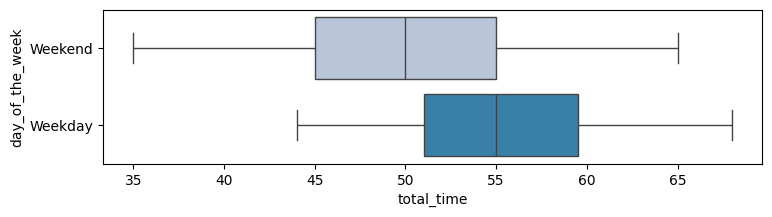

In [ ]:
# Relationship between day of the week and total time = (food_preparation_time + food_delivery_time)
plt.figure(figsize=(8.5,2))
sns.boxplot(y = "day_of_the_week", x = "total_time", data = df, palette = 'PuBu', hue = "day_of_the_week")  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

### Relationship between cuisine_type vs calculated average rating

Spanish - with ave. rating: 4.83
Thai - with ave. rating: 4.67
Indian - with ave. rating: 4.54
Mexican - with ave. rating: 4.42
Japanese - with ave. rating: 4.37
Italian - with ave. rating: 4.36
Chinese - with ave. rating: 4.34
Southern - with ave. rating: 4.31
French - with ave. rating: 4.30
American - with ave. rating: 4.30
Middle Eastern - with ave. rating: 4.24
Mediterranean - with ave. rating: 4.22
Korean - with ave. rating: 4.11
Vietnamese - with ave. rating: 4.00


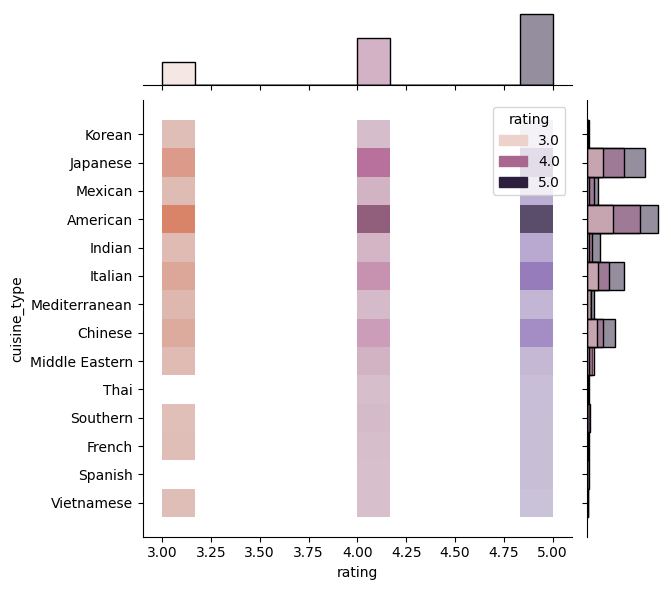

In [ ]:
# Calculate average rating per cuisine_type and sort.
average_ratings = df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

# Print the average ratings
for cuisine, rating in average_ratings.items():
    print(f"{cuisine} - with ave. rating: {rating:.2f}")

# Relationship between rating and cuisine type
sns.jointplot(data=df, x="rating", y="cuisine_type", hue="rating", kind="hist");

### Relationship between rating vs `calculated total time` (`preparation_time` <font color=red>**+**</font> `delivery_time`)

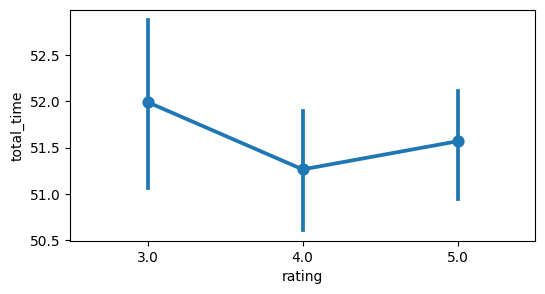

In [ ]:
# Relationship between rating and calculated total time
plt.figure(figsize=(6, 3))
sns.pointplot(x = 'rating', y = 'total_time', data = df)
plt.show()

### Relationship between rating vs food_preparation_time

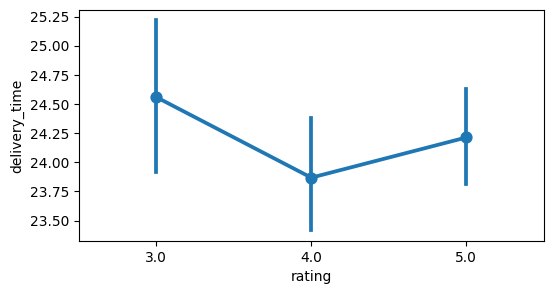

In [ ]:
# Relationship between rating and preparation time
plt.figure(figsize=(6, 3))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

### Relationship between rating vs food_delivery_time

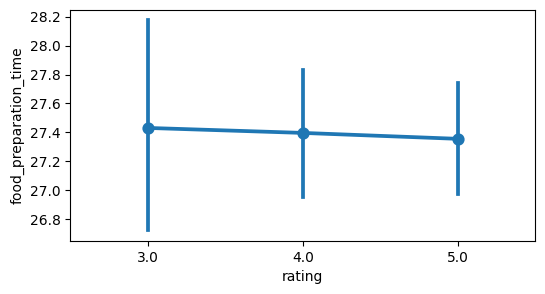

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(6, 3))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

### Relationship between rating vs cost_of_the_order

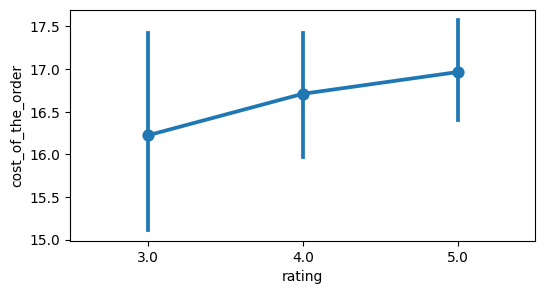

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(6, 3))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Calculate average ratings for each restaurant
df_avg_ratings = df.groupby('restaurant_name')['rating'].mean().reset_index()

# Merge rating counts and average ratings
df_combined = df_rating_count.merge(df_avg_ratings, on='restaurant_name')

# Filter for restaurants with rating count > 50 and average rating > 4
filtered_restaurants = df_combined[(df_combined['rating_x'] > 50) & (df_combined['rating_y'] > 4)]

# Create an explicit copy of the filtered DataFrame
filtered_restaurants = filtered_restaurants.copy()

# Format 'rating_y' to two decimal places using .loc
filtered_restaurants.loc[:, 'rating_y'] = filtered_restaurants['rating_y'].round(2)

# Display the filtered results
print(filtered_restaurants[['restaurant_name', 'rating_x', 'rating_y']])

             restaurant_name  rating_x  rating_y
0                Shake Shack       219      4.28
1          The Meatball Shop       132      4.51
2          Blue Ribbon Sushi       119      4.22
3  Blue Ribbon Fried Chicken        96      4.33
4                       Parm        68      4.13
5           RedFarm Broadway        59      4.24
6             RedFarm Hudson        55      4.18


--------------------- >> NOTE: Results seem different per walktrough -solutions

### Answer to Question #13:
---

TOP 5 Restaurants with Ave Rating greater than 4 and more than 50 orders:


| restaurant_name | Orders | Ave Rating |
|---|---|---|
|1. Shake Shack | 219 | 4.28 |
|2. The Meatball Shop | 132 | 4.51 |
|3. Blue Ribbon Sushi | 119 | 4.22 |
|4. Blue Ribbon Fried Chicken | 96 | 4.33 |
|5. Parm|68|4.13|
|6. RedFarm Boradway |59|4.24|
|7. RedFarm Hudson| 55| 4.8|


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Calculate individual revenue from filtered restaurants and orders matching the previous criteria:
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

# Calculate total revenue
net_revenue = df['Revenue'].sum().round(2)
print("The net revenue generated by the company across all orders = $  \033[1;31m{:.2f}\033[m".format(net_revenue))

# Review individual revenue by observing the cost_of_the_order and Revenue columns: ( for cost_of_the_order >$5 and >$20)
df.head()

The net revenue generated by the company across all orders = $  6166.30


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49,1.7385


In [ ]:
# For Clarity and Simplicity the Total Revenue:

# Calculate individual revenue from filtered restaurants and orders matching the previous criteria:
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

# Calculate total revenue
net_revenue = df['Revenue'].sum().round(2)
print("The net revenue generated by the company across all filtered orders = $  \033[1;31m{:.2f}\033[m".format(net_revenue))

The net revenue generated by the company across all filtered orders = $  6166.30


### Answer to Question #14:


---
The net revenue generated by the company across all orders =   <font color=red>**6166.30**</font>


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
orders_grt60mins = df[df['total_time'] >60]
print('Percentage of orders that take more than 60 minutes of total delivery time \033[1;31m\033[m', round(orders_grt60mins.shape[0] / df.shape[0] * 100, 2), '%')

Percentage of orders that take more than 60 minutes of total delivery time  10.54 %


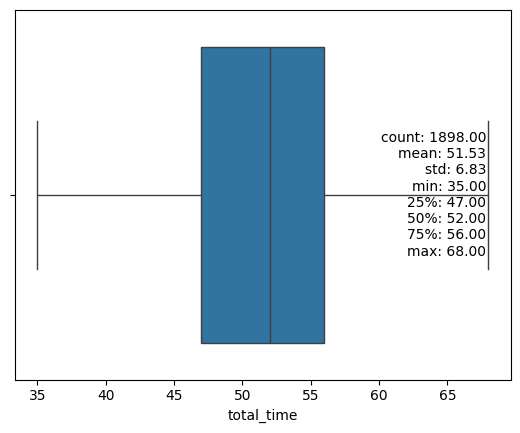

In [ ]:
# EXTRA CREDIT

# To run this cell independently, import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from foodhub_order.csv file.
df = pd.read_csv('/content/foodhub_order.csv')

# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Boxplot for food_preparation_time.
ax = sns.boxplot(data=df, x='total_time')

# Calculate and display all relevant statistics
stats = df['total_time'].describe()
text = "\n".join([f"{k}: {v:.2f}" for k, v in stats.items()])  # Format stats into a multi-line string

# Add text annotation with all statistics
ax.text(0.95, 0.5, text, transform=ax.transAxes, ha='right', va='center', fontsize=10)

plt.show()

### Answer to Question #15:


---
Percentage of orders that take more than 60 minutes of total delivery time:  <font color=red>**10.54 %**</font>



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

# mean delivery time on weekdays:
print('The mean delivery time on weekdays is: ',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes.')

# mean delivery time on weekends:
print('The mean delivery time on weekends is: ',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes.')

The mean delivery time on weekdays is:  28 minutes.
The mean delivery time on weekends is:  22 minutes.


In [ ]:
# EXTRA CREDIT

# Write the code here

# mean delivery time on weekdays:
mean_weekday_delivery = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())

# Formatted result
print('The mean delivery time on weekdays is approximately \033[1;31m{}\033[m minutes.'.format(mean_weekday_delivery))

The mean delivery time on weekdays is approximately 28 minutes.


In [ ]:
# EXTRA CREDIT

# Write the code here

# mean delivery time on weekends:
mean_weekend_delivery = round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())

#Formatted result
print('The mean delivery time on weekends is approximately \033[1;31m{}\033[m minutes.'.format(mean_weekend_delivery))

The mean delivery time on weekends is approximately 22 minutes.


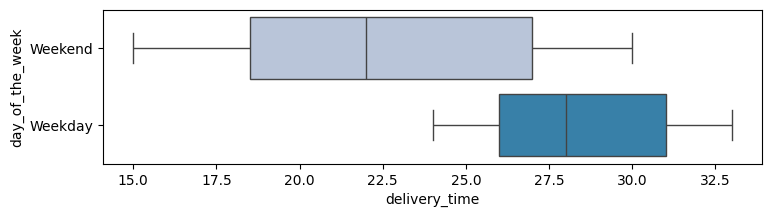

In [ ]:
# EXTRA CREDIT
# Compare the means calculated above and middle line of the boxplots for a match
plt.figure(figsize=(8.5,2))
sns.boxplot(y = "day_of_the_week", x = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

### Answer to Question #16:


---


The mean delivery time on weekdays is:  <Font color=red>**28** </font>minutes.

The mean delivery time on weekends is: <font color=red> **22** </font>minutes.


## Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Answers to Question #17


---


### Conclusions Summary:
(For details supporting evidence for these conclusions, please refer above.)


---

*  <font color=red> **Top Cuisines** </font>- some are significantly more popular than others.
*  <font color=red>**Top Restaurants**</font> - business incentives must be created to reward them. Specific restaurants drive the most orders and revenue.
*  <font color=red>**Top Customers**</font> - additional perks and loyalty programs must be created to reward behaviours. Specific customers display higher loyalty and higher spending patterns. Focusing on them can increase customer satisfaction and revenue as low hanging fruit.
*  <font color=red>**food_delivery_time, food_prepartion_time and total_tim**e</font> - there are  opportunities to improve these times, specially on weekends.
*  <font color=red>**day_of_the_week**</font> - weekends drive more revenue and more preparation must take place.
*  <font color=red>**rating problem** </font>- the majority of times ratings are not provided becoming a problem. Some cuisine-types generate higher ratings and more orders.

##TOP CUISINES

*   **cuisine_type** - Data type: <font color=green><b>*Obj*</b></font>
*   There are <font color=#FF0000>**14**</font> unique cuisine types.
*   These **Top 5** cuisine types received <font color=red>**90.6%**</font> of orders:
1. American   584 orders
2. Japanese   470 orders
3. Italian    215 orders
4. Chinese     96 orders
5. Mexican     77 orders          

### Business Recommendations
---
1.  Incentivize Top restaurants based on these cuisine types with more benefits and visibility.
2.  Identify a path to include more restaurants from these top cuisine types:
1st-American
2nd-Japanese
3rd-Italian
4th-Chinese
5th-Mexican


---


##TOP RESTAURANTS
*   **restaurant_name** - Data type: <font color=green><b>*Obj*</b></font>
*   Top 5 restaurants received <font color=red>**63.3%**</font> of orders that exceed 30 orders:
* Shake Shack                  219 orders
* The Meatball Shop            132 orders
* Blue Ribbon Sushi            119 orders
* Blue Ribbon Fried Chicken     96 orders
* Parm                          68 orders

### Business Recommendations
---
1.  Incentivize these restaurants with more benefits and visibility.
2.  Identify a path for other restaurants to do the same.


---


##TOP CUSTOMERS

*   customer_id - Data type: <font color=green><b>*Int*</b></font>
*   There are <font color=#FF0000>**33**</font> customers that have placed more than 4 orders.
*   There are <font color=#FF0000>**14**</font> customers that have placed more than 5 orders.
* <font color=#FF0000>**52%**</font> of the orders from the top customers (ordering more than 5 times) come from 6 customers!
*   The following customers are these top 6 customers with the following number of orders:

<table>
 <tr><th>customer_id</th><th>Orders</th></tr>
 <tr><td>52832<td>13</td></tr>
 <tr><td>47440<td>10</td></tr>
 <tr><td>83287<td>9</td></tr>
 <tr><td>250494<td>8</td></tr>
 <tr><td>259341<td>7</td></tr>
 <tr><td>82041<td>7</td></tr>
 </table>

### Business Recommendations:
 ___
*   The top customers (with more than 5 orders) could be incentivised by offering additional discounts, invitations to a customer loyalty program, turning them into VIP members, targeting them to refer more customers, making their feedback more visible as they are likely to provide with higher ratings.
*   Customers with less than 5 orders could be incentivized with additional discounts and a roadmap into the VIP membership.
*   All customers should be invited to display their ordered food in social media to create pride on cooking workmanship by the originating restaurants and provide more visibility of the restaurant options offered under FoodHub, their ratings and cuisine type to expand "the adoption funnel" and turn viewers into motivated subscription customers.
---

## TIMES TO COMPLETE THE ORDER

*   **food_preparation_time** - Data type: <font color=green><b>*`Int`*</b></font>
*  The value of the mean or average (mean) preparation time: <font color=red>**`27.37`**</font> minutes.
*  The value of the median preparation time: <font color=red>**`27.37`**</font> minutes.
*  The value of the shortest (min) preparation time: <font color=red>**`20.00`**</font> minutes.
*  The value of the longest (max) preparation time: <font color=red>**`35.00`**</font> minutes.

### Business Recommendations
---
*   food_preparation_time is directly associated with the reastaurant and explorations how to best prepare in advance anticipating orders peak times and weekends can decrease times.  This in turn favors customers satisfaction and ratings.   
*   food_preparation_time must be added to food_delivery_time to get a complete analysis for the overall order durations.


---


## DAY OF THE WEEK
*   **day_of_the_week** - Data type: <font color=green><b>*Obj*</b></font>
* There are more sales on **`weekends`** at the tune of <font color=red><b>`71.2%`</b></font> compared to weekedays at <font color=red><b>`28.8%`</b></font>.

### Business Recommendations
---
*   Advertize more sales and specials on weekends.
*   Encourage restaurants by top cuisine type to be more ready with planned food preparation ahead of the weekends.


---


## RATINGS PROBLEM
*  **rating** - Data type: <font color=green><b>*Obj*</b></font>
*  There are <font color=red>**736**</font> Ratings NOT Given. It's important to understand why from a business process standpoint.
* Analyze which parameters are affected before and after converting ratings to NaN. (Perhaps use a dataframe copy with NaN replaced the ratings Not Given.)
* Convert the 'rating' column to numeric type, handling errors by setting them to NaN. `df['rating'] = pd.to_numeric(df['rating'], errors='coerce')`
*  There are multiple ratings under restaurant names. A list with average ratings can be useful monitoring metric.
*  There are multiple ratings given by each customer, it would be interesting to see their raitings stats.

### Business Recommendations
---
*   Its crucial to require ratings or find ways to ensure the ratings are given per order, the number of orders where the ratings were not given is too high, way too high.
*   List item


---



---